# Проект "Банки - анализ оттока клиентов"

<a id='start' ></a>
# Оглавление
***
1. [Описание проекта и задачи.](#ch1)
2. [Импорт библиотек.](#ch2)
3. [Загрузка и предворительная оценка данных.](#ch3)
   - [Результат предварительной оценки данных](#ch3.1)
4. [Предобработка данных](#ch4)
   - [Переименование столбцов](#ch4.1)
   - [Поиск и обработка дубликатов](#ch4.2)
   - [Обработка пропусков](#ch4.3)
      - [Определение природы возникновения пропусков](#ch4.3.1)
      - [Пропуски в столбце age](#ch4.3.2)
      - [Пропуски в столбце balance](#ch4.3.3)
   - [Изменение типов данных](#ch4.4)
   - [Итоги предобработки](#ch4.5)
5. [Исследовательский анализ данных](#ch5)
   - [Сравнительный анализ распределений различных признаков в разрезе оттока клиентов](#ch5.1)
      - [Возраст](#ch5.1.1)
      - [Кредитный рейтинг](#ch5.1.2)
      - [Баланс](#ch5.1.3)
      - [Зарплата](#ch5.1.4)
      - [Дискретные и категориальные данные](#ch5.1.5)
   - [Корреляция признаков](#ch5.2)
   - [Портреты типичных клиентов банка](#ch5.3)
      - [Портрет лояльного клиента ](#ch5.3.1)
      - [Портрет ушедшего клиента](#ch5.3.2)
6. [Проверка статистических гипотез](#ch6)
   - [Гипотеза № 1. Сравнение дохода клиентов, которые ушли, и клиентов, которые остались лояльны банку](#ch6.1)
      - [Выбор статтеста](#ch6.1.1)
      - [Определение гипотез и проведение статистического теста](#ch6.1.2)
   - [Гипотеза № 2. Разница в доле оттока клиентов в Ярославле и Рыбинске](#ch6.2)
      - [Выбор статтеста](#ch6.2.1)
      - [Определение гипотез и проведение статистического теста](#ch6.2.2)
7. [Промежуточные итоги](#ch7)
8. [Сегментация клиентов](#ch8)
   - [Сегмент 1](#ch8.1)
   - [Сегмент 2](#ch8.2)
   - [Сегмент 3](#ch8.3)
   - [Сегмент 4](#ch8.4)
   - [Приоритезация сегментов](#ch8.5)
9. [Разработка рекомендаций по удержанию клиентов из различных сегментов](#ch9)
   - [Сегмент 1](#ch9.1)
   - [Сегмент 2](#ch9.2)
   - [Сегмент 3](#ch9.3)
   - [Сегмент 4](#ch9.4)
10. [Презентация результатов](#ch10)

<a id='ch1' ></a>
# Описание проекта и задачи

В региональном банке "Метанпромбанк" зафиксирован рост оттока клиентов. Необходимо проанализировать клиентов  и выделить сегменты, которые в наибольшей степени склонны уходить из банка. Письма для клиентов из рисковых сегментов будут готовиться вручную, поэтому сегменты должны быть компактными и одн/ородными. Также необходимо предложить варианты мероприятий, реализация которых позволит вернуть ушедших клиентов/удержать сомневающихся.

Результат анализа должен быть представлен в формате презентации, содержащей понятные графики и только самую необходимую информацию, изложенную в максимально сжатой форме, однако это не должно негативно сказаться на информативности презентации.

Для анализа в нашем распоряжении есть датасет, содержащий информацию о клиентах.

<a id='ch2' ></a>
# Импорт библиотек

In [1]:
pip install phik

  Obtaining dependency information for phik from https://files.pythonhosted.org/packages/53/e2/d1f5e9ce10f2cb9a8b3866f17cf7b47db95f086987565ecda6df542fe30b/phik-0.12.4-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 666.3/666.3 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import phik
from scipy import stats as st
import statistics
import math as mth

In [3]:
warnings.filterwarnings('ignore')

<a id='ch3' ></a>
# Загрузка и предварительная оценка данных

In [4]:
def reading(path_1, path_2):
    try:
        df = pd.read_csv(path_1)
    except:
        df = pd.read_csv(path_2)
    df.info()
    print('*' * 100)
    display(df.head())
    return df

In [5]:
data = reading('', 'bank_scrooge.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
****************************************************************************************************


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<a id='ch3.1' ></a>
## Результат предварительной оценки данных

В датафрейме ***10000 строк*** и ***11 столбцов***:

- **user_id** — уникальный идентификатор пользователя;
- **score** — баллы кредитного скоринга;
- **city** — город клиента;
- **gender** — пол клиента;
- **age** — возраст клиента;
- **equity** — количество баллов собственности, соответствующее количеству объектов собственности, принадлежащих клиенту;
- **balance** — баланс на счёте клиента;
- **products** — количество продуктов, которыми пользуется клиент;
- **credit_card** — есть ли кредитная карта у клиента *(1 - есть, 0 - нет)*;
- **last_activity** — является ли клиент активным *(1 - да, 0 - нет)*;
- **est_salary** — оценочный доход клиента;
- **сhurn** — признак оттока *(1 - клиент ушел из банка, 0 - клиент продолжает пользоваться услугами банка)*.
***
**Пропуски:**
- 26 пропусков в столбце **age**;
- 2295 пропусков в столбце **balance**.

**Типы данных:**
- Для столбцов **score** и **age** тип данных нужно поменять с **float** на **int**.

<a id='ch4' ></a>
# Предобработка данных

<a id='ch4.1' ></a>
## Переименование столбцов

Переименуем столбцы в соответствии со snake case.

In [6]:
data = data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})

In [7]:
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Названия столбцов обработаны в соответствии со стандартами написания кода на python.

<a id='ch4.2' ></a>
## Поиск и обработка дубликатов

Проверим, есть ли в датафрейме дубликаты.

In [8]:
data.duplicated().sum()

0

Полных дубликатов нет, однако в датафрейме есть столбец user_id, предполагающий, что все значения в нем должны быть уникальными. Проверим наличие дубликатов только в данном столбце.

In [9]:
data['user_id'].duplicated().sum()

73

In [10]:
dup_data = data[data['user_id'].duplicated() == True]['user_id']

In [11]:
data[data['user_id'].isin(dup_data) == True].sort_values(by='user_id').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Посмотрев на первых пятерых пар дублей, можно заметить, что у них всегда разные города. При этом есть случаи, что пол клиента с одинаковым user id невсегда совпадает.
Вероятно, это может быть связано с каким-то временным сбоем в системе, когда user id клиентов из разных городов дублировались.

Мы можем заменить user_id дубликатов на свободные значения.

In [12]:
data[data['user_id'] <= 73]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Нет user_id от 1 до 73. Заменим user_id дубликатов.

In [13]:
sample_data = data[data['user_id'].duplicated() == True]

In [14]:
sample_data['user_id'] = list(range(1, 74))

In [15]:
sample_data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,1,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,2,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2138,3,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2165,4,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2302,5,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,69,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,70,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,71,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,72,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


In [16]:
data[data['user_id'].duplicated() == True] = sample_data

In [17]:
data[data['user_id'] <=74]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,1,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,2,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2138,3,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2165,4,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2302,5,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,69,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,70,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,71,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,72,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


In [18]:
data['user_id'].duplicated().sum()

0

Мы обработали дубликат и сохранили данные о пользователях.

<a id='ch4.3' ></a>
## Обработка пропусков

<a id='ch4.3.1' ></a>
### Определение природы возникновения пропусков

Для того, чтобы принять решение, как обрабатывать пропуски в данных, сначала необходимо определить природу их возникновения.

Пропуски можно разделить на 3 основные группы:
- **MCAR** (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;
- **MAR** (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;
- **MNAR** (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.


<a id='ch4.3.2' ></a>
### Пропуски в столбце age

Так как у нас всего 26 пропусков в столбце **age**, то сначала выведем их на экран и оценим, есть ли какой-то общий принцип, по которому возникли пропуски.

In [19]:
data[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,4,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,6,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,16,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,17,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,29,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,30,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Небольшое количество пропусков в данном столбце позволяет оценить их визуально. Мы видим, что все признаки клиентов представлены разннобразно: есть разные города, кредитный рейтинг, пол и т.д. **Данные пропуски не относятся к типу MNAR.**

Количество пропусков в столбце **age** столь незначительно по сравнению с общим количеством строк, что наиболее оптимальным решением будет удаление данных строк.

In [20]:
data = data[data['age'].isna() == False]

In [21]:
data[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Пропуски в столбце **age** обработаны.

<a id='ch4.3.3' ></a>
### Пропуски в столбце balance

В столбце **balance** более двух тысяч пропусков, поэтому для их анализа применим другой метод.

Сначала создадим дополнительный столбец, содержащий информацию о том, есть ли в данной строке пропуск в столбце **balance**.

In [22]:
data['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

In [23]:
data['balance_is_nan'] = data['balance'].isna()

Теперь необходимо создать в таблицу, в которой для группы с пропусками и группы без пропусков в столбце  **balance** будут сравниваться срединные значения всех признаков.

Проверим, распределение признаков, представленных в виде непрерывных значений, чтобы правильно выбрать меру, наиболее точно характеризующую их срединное значение.

Для категориальных признаков мы будем брать моду в качестве срединного значения.

In [24]:
data[['score', 'age', 'est_salary', 'products', 'equity']].describe().round(2)

,score,age,est_salary,products,equity
count,9974.00,9974.00,9974.00,9974.00,9974.00
mean,848.68,42.73,147786.81,1.87,2.63
std,65.40,12.18,139285.51,0.79,1.98
min,642.00,18.00,2546.30,0.00,0.00
25%,802.00,33.00,75251.66,1.00,0.00
50%,853.00,40.00,119626.80,2.00,3.00
75%,900.00,51.00,174499.81,2.00,4.00
max,1000.00,86.00,1395064.45,5.00,9.00


У **score** среднее и медиана практически одинаковы, но лучше взять медиану, так как это целое число. Для **products** и **equity** тоже лучше взять медиану, так как целое значение лучше отображают суть признака.
У столбцов **age** и **est_salary** между средним и медианой большая разница, вероятно в данных есть выбросы. Посмотрим на распределение указанных величин, чтобы принять окончательное решение.

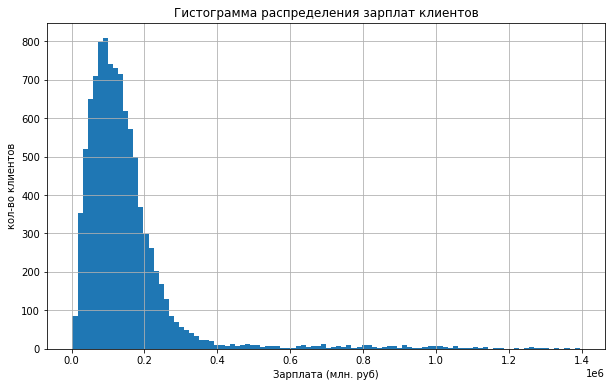

In [25]:
plt.figure(figsize=(10,6))
data['est_salary'].hist(bins=100)
plt.title('Гистограмма распределения зарплат клиентов')
plt.xlabel('Зарплата (млн. руб)')
plt.ylabel('кол-во клиентов');

Мы видим, что большая часть значений не превышает 400 000 рублей, но при этом есть выбросы вплоть до 1 400 000 рублей. Поэтому для анализа пропусков будем использовать **медиану**.

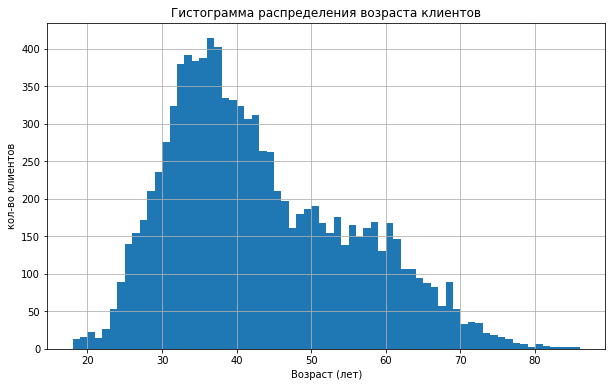

In [26]:
plt.figure(figsize=(10,6))
(data['age']
 .hist(bins=(
     int(
         max(data['age']) - min(data['age'])
     )
 )
      )
);
plt.title('Гистограмма распределения возраста клиентов')
plt.xlabel('Возраст (лет)')
plt.ylabel('кол-во клиентов');

Распределение возраста отличается от нормального, также есть выбросы на интервале от 18 до 22 лет и от 75 до 86. Будем также использовать **медиану**.

In [27]:
compare_table_1 =(
    data.pivot_table(columns = 'balance_is_nan',
                     aggfunc = {'est_salary':['median', 'mean'], 
                          'age':['median', 'mean'], 
                          'score':['median', 'mean'], 
                          'equity':'median',
                          'products':'median'})
)

In [28]:
compare_table_1 = round(compare_table_1,1)

In [29]:
compare_table_1['difference'] = compare_table_1[0] - compare_table_1[1]

In [30]:
compare_table_1

balance_is_nan        False      True  difference
age        mean        42.9      42.1         0.8
           median      40.0      40.0         0.0
equity     median       4.0       0.0         4.0
est_salary mean    124520.4  226345.4   -101825.0
           median  106250.2  174347.9    -68097.7
products   median       2.0       1.0         1.0
score      mean       843.7     865.4       -21.7
           median     840.0     903.0       -63.0

In [31]:
compare_table = (pd.concat([data[data['balance']
                 .isna() == True][['city', 
                                   'gender', 
                                   'credit_card', 
                                   'last_activity', 
                                   'churn']]
                .mode(), data[data['balance']
                              .isna() == False][['city', 
                                                 'gender', 
                                                 'credit_card', 
                                                 'last_activity', 
                                                 'churn']].mode()])
                 .T
)

In [32]:
compare_table.columns = ['balnce_is_nan', 'balance_is_real']

In [33]:
compare_table

,balnce_is_nan,balance_is_real
city,Ярославль,Ярославль
gender,М,Ж
credit_card,1,1
last_activity,1,1
churn,0,0


В результате мы видим, что есть заметные различия в:
- количестве баллов собственности;
- зарплате;
- кредитном уровне;
- гендере.

Рассмотрим соотношение каждого из этих признаков, чтобы определить, какова природа пропусков.

In [34]:
no_balance_data = data[data['balance_is_nan'] == True]

In [35]:
balance_data = data[data['balance_is_nan'] == False]

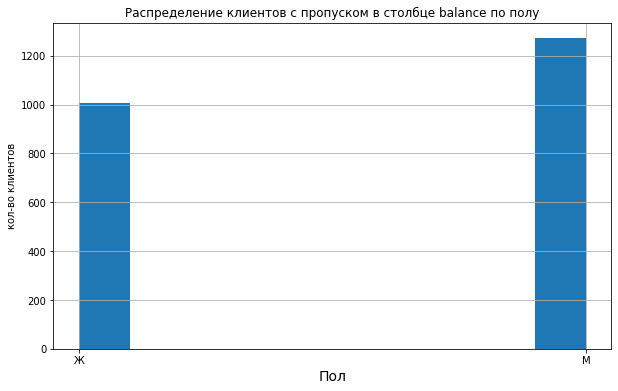

In [36]:
plt.figure(figsize=(10,6))
no_balance_data['gender'].hist()
plt.title('Распределение клиентов с пропуском в столбце balance по полу')
plt.xlabel('Пол', fontsize=14)
plt.ylabel('кол-во клиентов');

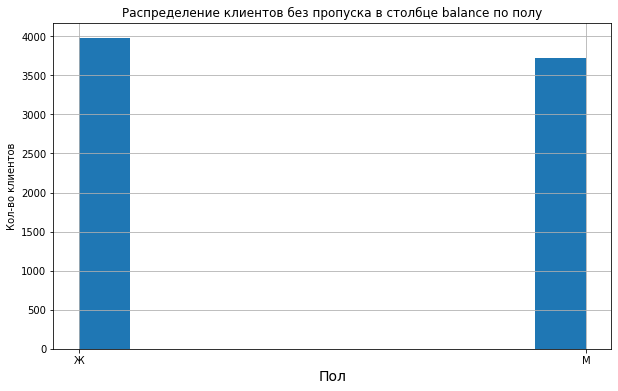

In [37]:
plt.figure(figsize=(10,6))
balance_data['gender'].hist()
plt.title('Распределение клиентов без пропуска в столбце balance по полу')
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Кол-во клиентов');

Мы не видим, большой разницы в соотношении полов у данных с пропусками и без. Вероятно, этот признак не связан с причиной возникновения пропусков.

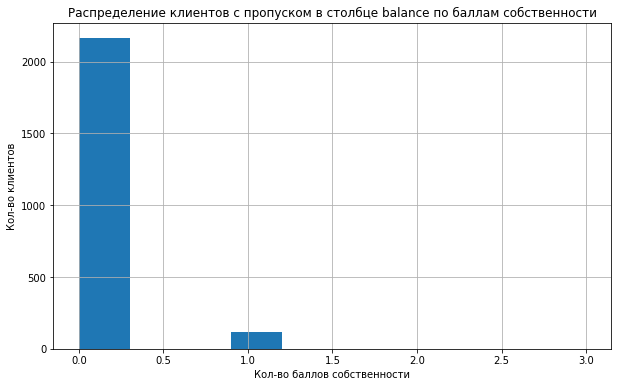

In [38]:
plt.figure(figsize=(10,6))
no_balance_data['equity'].hist()
plt.title('Распределение клиентов с пропуском в столбце balance по баллам собственности')
plt.xlabel('Кол-во баллов собственности')
plt.ylabel('Кол-во клиентов');

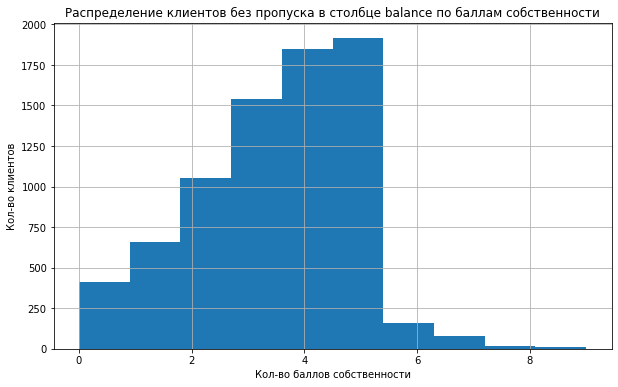

In [39]:
plt.figure(figsize=(10,6))
balance_data['equity'].hist()
plt.title('Распределение клиентов без пропуска в столбце balance по баллам собственности')
plt.xlabel('Кол-во баллов собственности')
plt.ylabel('Кол-во клиентов');

Видно, что практически у всех пользователей с пропуском в значении баланса 0 быллов собственности и изредка 1 балл, в то же время у пользователей с балансом в оснвном от 3 до 5 баллов собственности. Следовательно, мы не сможем удалить строки с пропусками, так как это значительно исказит распределение признака "количество баллов собственности".

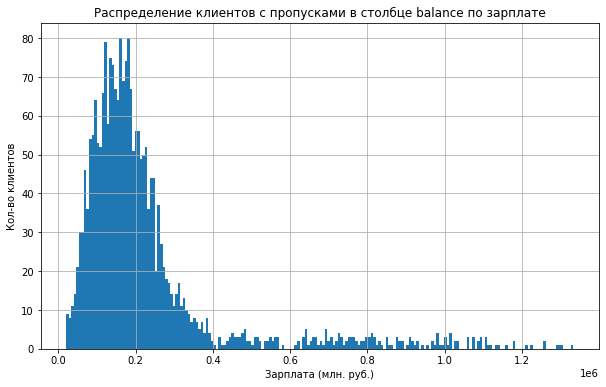

In [40]:
plt.figure(figsize=(10,6))
no_balance_data['est_salary'].hist(bins=200)
plt.title('Распределение клиентов с пропусками в столбце balance по зарплате')
plt.xlabel('Зарплата (млн. руб.)')
plt.ylabel('Кол-во клиентов');

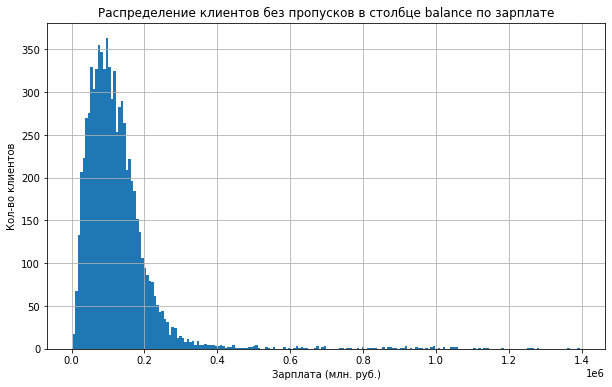

In [41]:
plt.figure(figsize=(10,6))
balance_data['est_salary'].hist(bins=200)
plt.title('Распределение клиентов без пропусков в столбце balance по зарплате')
plt.xlabel('Зарплата (млн. руб.)')
plt.ylabel('Кол-во клиентов');

Распределение данных о зарплате среди пользователей с пропусками и без похоже, разница заключается в том, что распределение клиентов с пропусками смещено вправо.

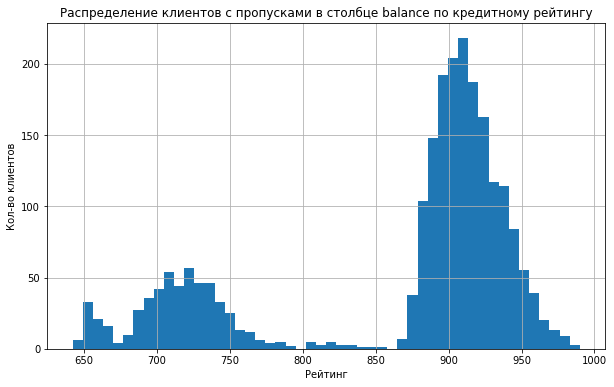

In [42]:
plt.figure(figsize=(10,6))
no_balance_data['score'].hist(bins=50)
plt.title('Распределение клиентов с пропусками в столбце balance по кредитному рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во клиентов');

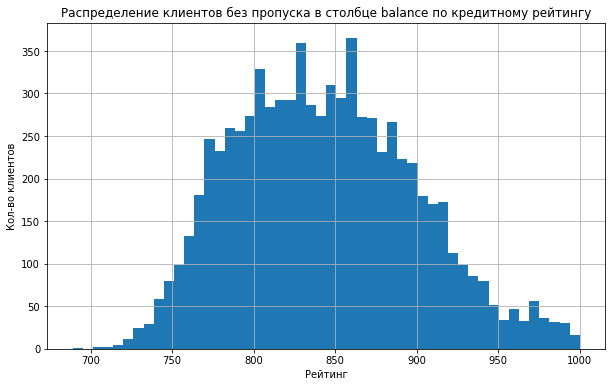

In [43]:
plt.figure(figsize=(10,6))
balance_data['score'].hist(bins=50)
plt.title('Распределение клиентов без пропуска в столбце balance по кредитному рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во клиентов');

Мы можем наблюдать, что у пользователей с пропусками наблюдается провал в распределении рейтинга на интервале от 750 до 875 и всплески на интервалах от 650 до 750 и от 875 до 950. Распределение рейтинга у пользователей без пропусков имеет обратную структуру - практически все значения находятся в интервале от 750 до 950, а на интервале от 950 до 1000 и от 750 до 700 находится минимум значений.

Для замены пропусков нам нужно отобрать клиентов с балансом, максимально похожих на клиентов, у которых баланс отсутствует, посчитать для их баланса медиану и заменить ею пропуски.

Наиболее важным для нас критерием является признак churn.

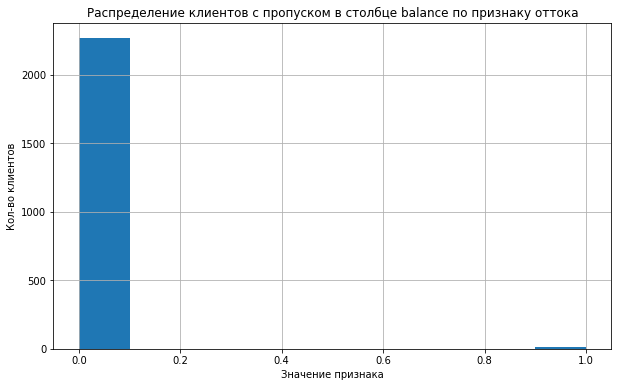

In [44]:
plt.figure(figsize=(10,6))
no_balance_data['churn'].hist();
plt.title('Распределение клиентов с пропуском в столбце balance по признаку оттока')
plt.xlabel('Значение признака')
plt.ylabel('Кол-во клиентов');

Как мы видим практически все пользователи с пропуском в балансе остались в банке. Следовательно в разрезе отточности пользователи без баланса крайне однородны. Мы можем использовать этот признак для ограничения выборки клиентов, чьи балансы мы используем для расчета медианного баланса для заполнения пропусков.

Если мы впишем один и тот же баланс во все пропуски, то это очень сильно исказит наши данные. Нам нужен признак, значения которого достаточно разнообразны, чтобы мы могли точнее рассчитать медианные балансы. Также данный признак должен коррелировать с уровнем баланса.

In [45]:
balance_data[balance_data['churn'] == 0].corr()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_nan
user_id,1.000000,0.014006,0.000914,-0.000935,0.001524,-0.035318,-0.010321,-0.027602,-0.000774,NaN,NaN
score,0.014006,1.000000,0.058801,0.267305,0.196649,0.044664,-0.041628,-0.145866,0.252990,NaN,NaN
age,0.000914,0.058801,1.000000,0.027300,0.076211,0.017201,-0.134459,0.044891,-0.060447,NaN,NaN
equity,-0.000935,0.267305,0.027300,1.000000,0.155243,0.105371,-0.054169,-0.029758,0.068683,NaN,NaN
balance,0.001524,0.196649,0.076211,0.155243,1.000000,0.044358,-0.046309,-0.002632,0.299499,NaN,NaN
products,-0.035318,0.044664,0.017201,0.105371,0.044358,1.000000,-0.305661,0.057776,-0.015246,NaN,NaN
credit_card,-0.010321,-0.041628,-0.134459,-0.054169,-0.046309,-0.305661,1.000000,-0.006506,-0.026073,NaN,NaN
last_activity,-0.027602,-0.145866,0.044891,-0.029758,-0.002632,0.057776,-0.006506,1.000000,-0.068641,NaN,NaN
est_salary,-0.000774,0.252990,-0.060447,0.068683,0.299499,-0.015246,-0.026073,-0.068641,1.000000,NaN,NaN
churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Наибольшее корреляция наблюдается у баланса и ожидаемой зарплаты. Однако ожидаемая зарплата рассчитана с точностью до копеек, поэтому при расчетах возникнут ситуации, когда нет одинаковых зарплат для расчета медианного баланса.

Создадим дополнительный столбец, где будут указаны зарплаты, округленные до десятков тысяч рублей.

In [46]:
data['salary_round'] = round(data['est_salary']/10000, 0).astype('int')

In [47]:
fill_data = data[(data['balance'].isna() == False) & (data['churn'] == 0)]

In [48]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_nan,salary_round
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,False,8
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,False,9
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,True,11
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,False,17
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,False,7


In [49]:
for salary in data['salary_round'].unique():
        data.loc[(data['balance'].isna()) & (data['salary_round'] == salary), 'balance'] \
        = fill_data.loc[(fill_data['salary_round'] == salary), 'balance'].median() 

In [50]:
data['balance'].isna().sum()

84

У нас осталось 84 пропуска. Вероятно, для данных клиентов не нашлось данных с таким же **salary_round**. Однако теперь пропусков мало (менее 1% от общего количества строк), пожтому мы можем удалить их.

In [51]:
data = data[data['balance'].isna() == False]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9890 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9890 non-null   int64  
 1   score           9890 non-null   float64
 2   city            9890 non-null   object 
 3   gender          9890 non-null   object 
 4   age             9890 non-null   float64
 5   equity          9890 non-null   int64  
 6   balance         9890 non-null   float64
 7   products        9890 non-null   int64  
 8   credit_card     9890 non-null   int64  
 9   last_activity   9890 non-null   int64  
 10  est_salary      9890 non-null   float64
 11  churn           9890 non-null   int64  
 12  balance_is_nan  9890 non-null   bool   
 13  salary_round    9890 non-null   int32  
dtypes: bool(1), float64(4), int32(1), int64(6), object(2)
memory usage: 1.0+ MB


In [53]:
data = data.query('products != 0')

Пропуски обработаны.

<a id='ch4.4' ></a>
## Изменение типов данных

В столбце **score** только целые значения, поэтому заменим тип данных с **float** на **int**.

In [54]:
data['score'] = data['score'].astype('int')

In [55]:
data['age'] = data['age'].astype('int')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9889 non-null   int64  
 1   score           9889 non-null   int32  
 2   city            9889 non-null   object 
 3   gender          9889 non-null   object 
 4   age             9889 non-null   int32  
 5   equity          9889 non-null   int64  
 6   balance         9889 non-null   float64
 7   products        9889 non-null   int64  
 8   credit_card     9889 non-null   int64  
 9   last_activity   9889 non-null   int64  
 10  est_salary      9889 non-null   float64
 11  churn           9889 non-null   int64  
 12  balance_is_nan  9889 non-null   bool   
 13  salary_round    9889 non-null   int32  
dtypes: bool(1), float64(2), int32(3), int64(6), object(2)
memory usage: 975.4+ KB


Типы данных изменены на более подходящие.

<a id='ch4.5' ></a>
## Итоги предобработки

На этапе предобработки данных мы обнаружили 73 дубликата. После их изучения мы установили, что скорее всего возникновение дубликатов связано со сбоем регистрации новых клиентов, из-за которого в какой-то момент клиенты, становившиеся клиентами банка в разных городах: Ярославле и Рыбинске получали одинаковый ID.

Мы присвоили клиентам-"дубликатам" незанятые ID, тем самым сохранив их в датафрейме.
***
В датафрейме было 26 пользователей с пропуском в столбце **age**. В связи с малочисленностью строк с пропуском мы смогли визуально их изучить и установили, что скорее всего пропуски возникли случайно. По причине небольшого количества строк с пропусками в столбце **age** мы удалили их.

Также у нас было 2295 пользователей с пропуском в столбце **balance**. Мы выяснили, что кредитный рейтинг пользователей с пропусками практически не пересекается с кредитным рейтингом пользователей без пропусков. Также практически все пользователи с пропуском в балансе остались в банке, то есть мы видим связь пропусков с данными и можем говорить о том, что данные пропуски отностся к типу **MNAR**. В связи с этим возможности удаления пропусков у нас не было.

Также мы установили, что практически все клиенты с пропусками в балансе остаются лояльными банку. Поэтому для заполнения пропусков мы использовали сведения о балансе пользователей, которые лояльны банку.

Для обеспечения максимально гибкого подхода к заполнению пропусков мы выбрали непрерывный признак, наиболее коррелирующий с уровнем баланса - ожидаемую зарплату. Затем мы создали дополнительный столбец, где указана зарплата, округленная до десятков тысяч. Это позволило нам избежать проблемы, связанной с тем, что каждая зарплата рассчитана с точностью до копейки и поэтому практически уникальна. Затем мы заполнили пропуски медианными балансами лояльных клиентов с такой же зарплатой (в десятках тысяч). После этого у нас осталось всего 84 пропуска - менее 1% от общего количества строк. Эти строки мы удалили в виду их малочисленности.
***
У столбцов **score** и **age**  тип данных изначально был **float**, однако в этих столбцах представлены только целые числа, поэтому мы изменили тип данных на **int**.

<a id='ch5' ></a>
# Исследовательский анализ данных

<a id='ch5.1' ></a>
## Сравнительный анализ распределений различных признаков в разрезе оттока.

Сравним распределение непрерывных признаков для ушедших и оставшихся клиентов, чтобы выявить отличия в распределениях, так как они могут быть ключом к причине ухода клиентов. Для наибольшей наглядности будем строить гистограммы или боксплоты.

In [57]:
data[data['churn'] == 1]['churn'].count()

1817

In [58]:
data[data['churn'] == 0]['churn'].count()

8072

In [59]:
round(data[data['churn'] == 1]['churn'].count()/data[data['churn'] == 0]['churn'].count(), 4)

0.2251

В нашем датафрейме оставшихся пользователей почти в 5 раз больше чем ушедших: 8155 против 1819.

In [60]:
mean_churn = round(data[data['churn'] == 1]['churn'].count()/data['churn'].count(), 4)
mean_churn

0.1837

Доля ушедших клиентов составляет 0.1838 или 18.38%.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Среднебанковский отток найден правильно

<a id='ch5.1.1' ></a>
### Возраст

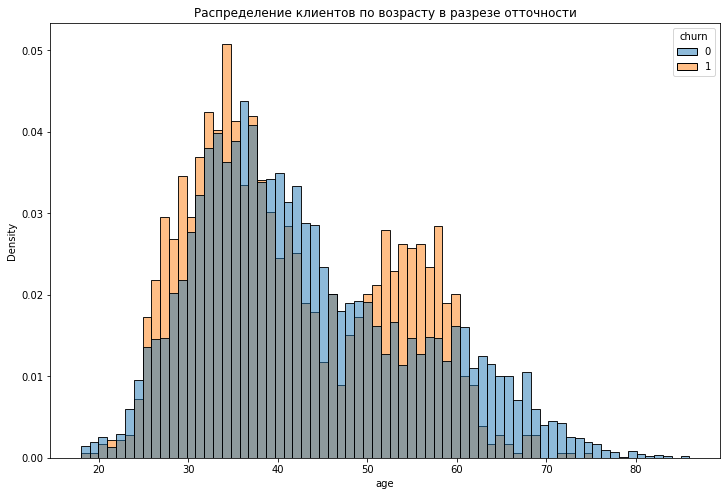

In [61]:
plt.figure(figsize=(12,8))
sns.histplot(x='age', data=data, hue='churn', stat="density", common_norm=False, bins=max(data['age']) - min(data['age']) + 1)
plt.title('Распределение клиентов по возрасту в разрезе отточности');

На графике видны 2 "рисковые" возрастные группы, где количество ушедших клиентов превышает количество оставшихся:
- от 25 до 35 лет;
- от 50 до 60 лет.

<a id='ch5.1.2' ></a>
### Кредитный рейтинг

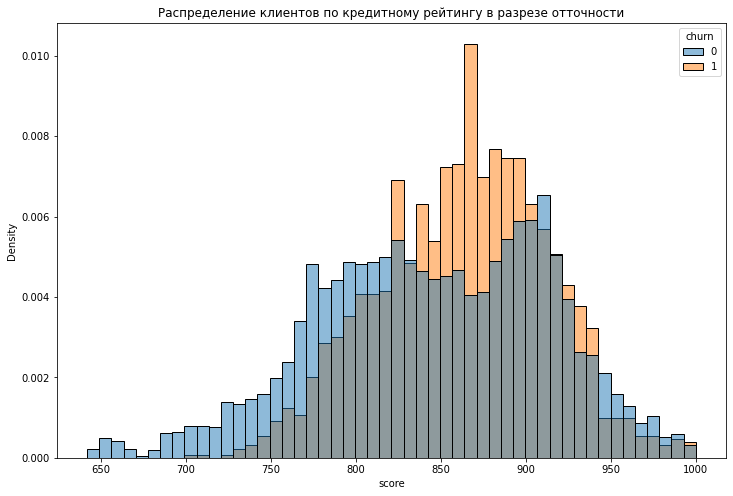

In [62]:
plt.figure(figsize=(12,8))
sns.histplot(x='score', data=data, hue='churn', stat="density", common_norm=False, bins=50)
plt.title('Распределение клиентов по кредитному рейтингу в разрезе отточности');

Рисковой группой являются клиенты с кредитным рейтингом выше среднего - от 820 до 940.

<a id='ch5.1.3' ></a>
### Баланс

В столбце **balance** присутствуют экстремальные выбросы, поэтому мы ограничим данные, которые попадут на гистограмму, чтобы обеспечить наглядность. Сверхбольшие счета мы рассмотрим отдельно.

In [63]:
np.percentile(data['balance'], 95)

2302167.338000001

Рассмотрим клиентов, у которых баланс ниже 2 300 000 руб.

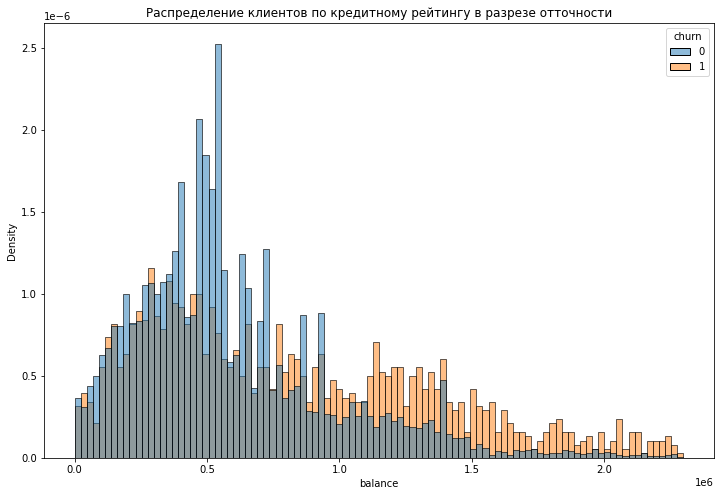

In [64]:
plt.figure(figsize=(12,8))
sns.histplot(x='balance', data=data[data['balance'] <= 2300000], hue='churn', stat="density", common_norm=False, bins=100)
plt.title('Распределение клиентов по кредитному рейтингу в разрезе отточности');

Мы видим, что начиная от суммы на балансе равной примерно 800 000 рублей, заметна тенденция на уход из банка, и чем больше сумма, тем сильнее отток клиентов.

In [65]:
data[(data['balance'] > 2300000) & (data['churn'] == 1)]['user_id'].count()/data[data['balance'] > 2300000]['user_id'].count()

0.321285140562249

In [66]:
data[(data['balance'] > 2300000) & (data['churn'] == 1)]['user_id'].count()/data['user_id'].count()

0.016179593487713622

Среди клиентов со сверхбольшими балансами (больше 2 300 000 рублей) почти треть отказались от услуг банка. И пусть относительно общего количества клиентов их доля незначительна (1.6%), но клиенты с крупными счетами крайне важны для банков, особенно если банк является региональным. Поэтому для данной категории клиентов тоже нужно предложить какие-либо рекомендации.

<a id='ch5.1.4' ></a>
### Зарплата

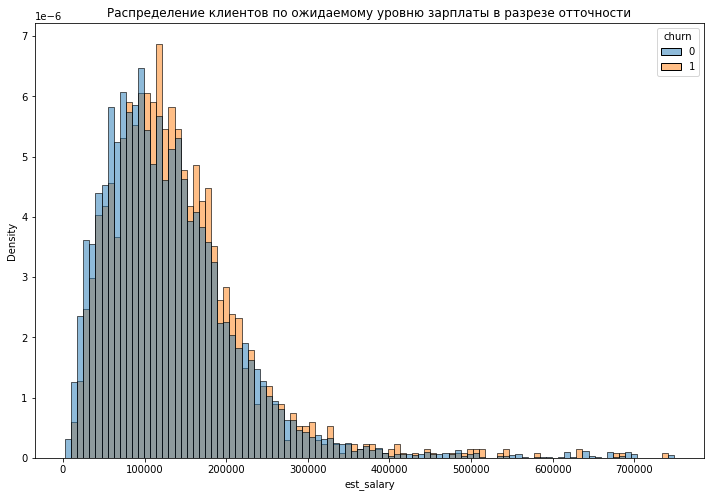

In [67]:
plt.figure(figsize=(12,8))
sns.histplot(x='est_salary', data=data[data['est_salary'] <= 750000], hue='churn', stat="density", common_norm=False, bins=100)
plt.title('Распределение клиентов по ожидаемому уровню зарплаты в разрезе отточности');

В зону риска оттока попадают клиенты с зарплатой более 100 000 рублей. Это перекликается с признаком суммы на балансе, где также в зоне риска были люди с большими суммами. Вероятно, в банке не развито направление по работе с премиальными клиентами.

<a id='ch5.1.5' ></a>
### Дискретные и категориальные признаки

Для анализа оттока по дискретным и категориальным признаком в наибольшей степени подойдут столбчатые диаграммы. Также построение барплотов не предполагает точечных настроек графиков, поэтому мы можем создать функцию, которая построит по всем интересующим нас признакам.

In [68]:
def barplot_builder(features = []):
    for elem in features:
        plt.figure(figsize=(10,10))
        sns.barplot(x=elem, y='churn', data=data)
        plt.title(f'Доля ушедших клиентов с разбивкой по признаку {elem}', fontsize=18)
        plt.xlabel(f'Значения признака {elem}')
        plt.ylabel('Доля ушедших клиентов', fontsize=14)
        plt.xticks(fontsize=12)
        plt.axhline(mean_churn, color='r', linestyle='--', label='Средний уровень оттока')
        plt.legend(fontsize=14)
        plt.show();

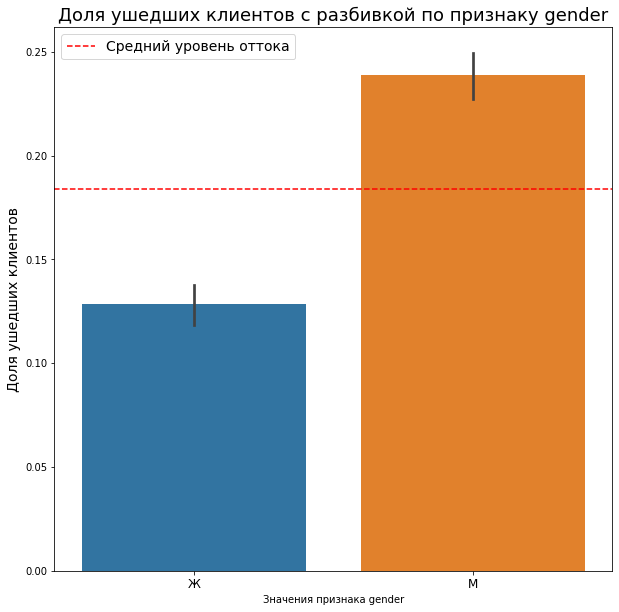

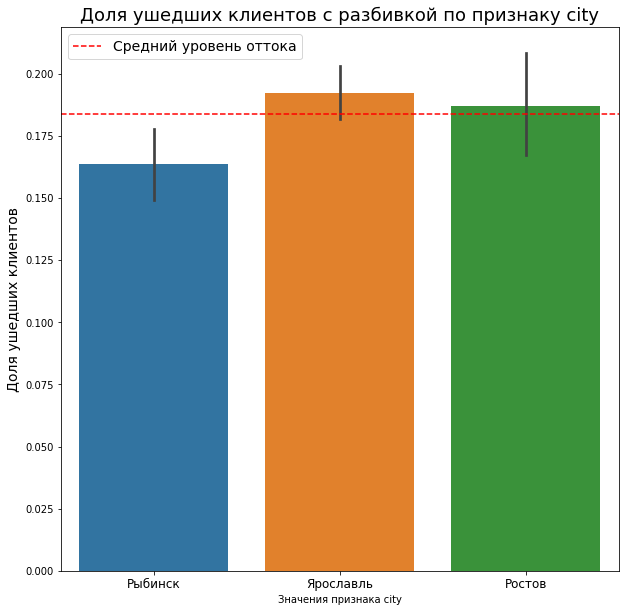

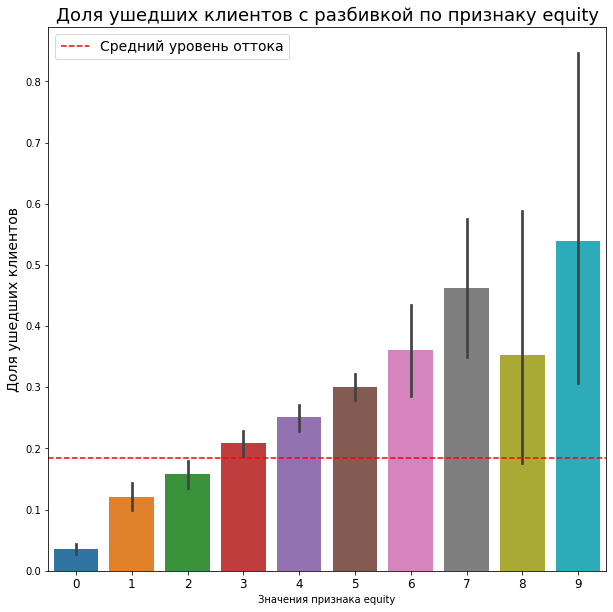

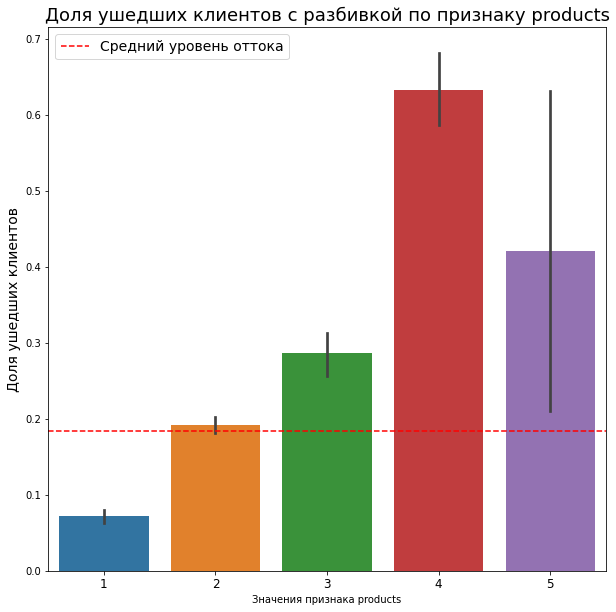

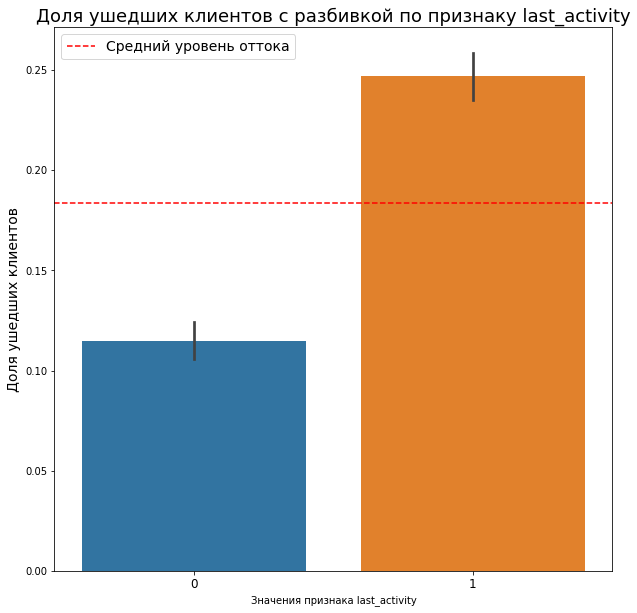

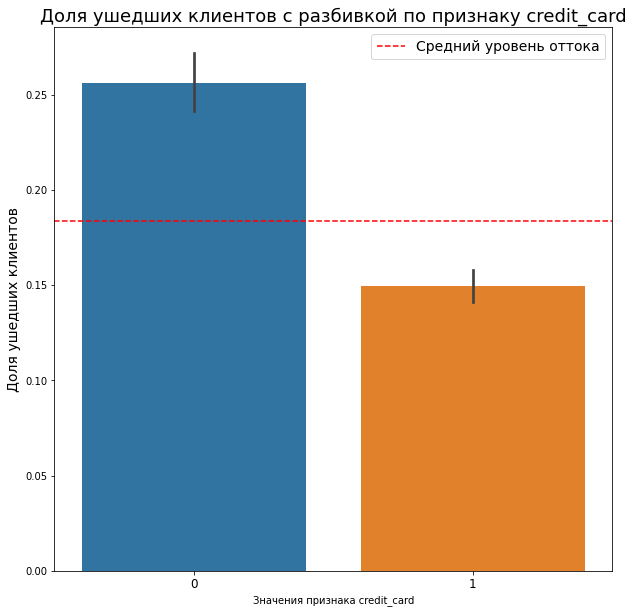

In [69]:
barplot_builder(['gender', 'city', 'equity', 'products', 'last_activity', 'credit_card'])

Прежде чем анализировать графики обратим внимания на аномальные значения.

Судя по графику оттока клиентов с разбивкой по признаку количества продуктов, в датафрейме есть клиенты, у которых количество продуктов равно 0. Такого не может быть, так как клиент банка пользуется как минимум одним продуктом, иначе он не стал бы клиентом.


In [70]:
data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_is_nan,salary_round


Такой пользователь всего один. Скорее всего 0 в столбце **products** вызван ошибкой при вводе данных. Удалим его из датафрейма и не будем учитывать при разработке рекомендаций.

In [71]:
data = data[data['products'] != 0]

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9889 non-null   int64  
 1   score           9889 non-null   int32  
 2   city            9889 non-null   object 
 3   gender          9889 non-null   object 
 4   age             9889 non-null   int32  
 5   equity          9889 non-null   int64  
 6   balance         9889 non-null   float64
 7   products        9889 non-null   int64  
 8   credit_card     9889 non-null   int64  
 9   last_activity   9889 non-null   int64  
 10  est_salary      9889 non-null   float64
 11  churn           9889 non-null   int64  
 12  balance_is_nan  9889 non-null   bool   
 13  salary_round    9889 non-null   int32  
dtypes: bool(1), float64(2), int32(3), int64(6), object(2)
memory usage: 975.4+ KB


***
**Важно:** на всех графиках столбцы демонстрируют долю ушедших клиентов от общего количества клиентов, обладающих таким же значением указанного признака, и не отражает абсолютные значения ушедших клиентов. 

Это означает, что если на диаграмме один столбец выше другого - это не означает ухода большего количества клиентов с данным признаком. 

Например если предположить, что среди клиентов банка 3 женщины, из которых 2 перестали быть клиентами банка, и 1000 мужчин, из которых 400 перестало быть клиентами банка, то на диаграмме столбец, демонстрирующий долю ушедших женщин будет выше столбца, отображающего долю ушедших мужчин.

Это важно учитывать при последующей оценке приоритетности групп клиентов, уход которых нужно предотвратить. Так гораздо важнее предотвратить отток из группы с долей оттока на уровне среднего оттока из банка, в которую входит 8000 клиентов, чем из группы, где доля оттока высока, но в которую при этом входит всего несколько десятков человек.
***
На графиках мы видим следующее:
- **Пол клиента:** доля ушедших мужчин значительно выше доли ушедших женщин и заметно превышает средний уровень по банку.
- **Город клиента:** в Ярославле и Ростове отток немного выше чем в среднем по банку, а в Рыбинске заметно ниже.
- **Баллы собственности (количество объектов собственности):** Наблюдается явная тенденция - чем больше собственности у клиентов, тем с большей вероятностью они покидают банк. Начиная с трех баллов доля оттока превышает средний уровень по банку.
- **Количество продуктов**: Мы видим, что уровень оттока клиентов, у которых 3 и более продуктов значительно превышает средний уровень оттока по банку. Клиенты с двумя продуктами демонстрируют средний отток, а клиенты с одним продуктом имеют уровень оттока более чем в два раза ниже чем в среднем по банку.
- **Активность:** наблюдается неожиданный результат: активные клиенты уходят намного чаще чем в среднем по банку, а клиенты, которые не демонстрировали активность в последнее время, наоборот заметно лояльнее чем в среднем по банку. Скорее всего это связано с тем, что банк не может предложить активным пользователям то, что они ождиают получить от банка в современных условиях. Это укладывается в единую картину с тем, что клиенты с высокой зарплатой и большими суммами на счетах являются наименее лояльной категорией клиентов.
- **Наличие кредитной карты:** доля оттока у клиентов без кредитной карты выше среднего уровня оттока клиентов из банка. Клиенты с кредитной картой наоборот в меньшей степени склонны отказываться от услуг банка.

<a id='ch5.2' ></a>
## Корреляция признаков

Рассмотрим корреляцию признаков между собой, обратив особое внимание на корреляцию с признаком оттока. Можно предположить, что корреляция признаков нелинейна, например если рассматривать зарплату, то разница между 20 000 руб. и 70 000 значительнее чем между 200 000 и 250 000 руб., что также влияет на корреляцию с другими признаками. Поэтому мы используем библиотеку phik, которая позволит посчитать корреляцию с учетом того, к какому типу относится тот или иной признак (непрерывный/дискретный). **Но** данный метод расчета не показывает направленность взаимосвязи. На предыдущем этапе уже оценили направленность взаимосвязи признака отточности с другими признаками, поэтому отсутствие данной информации при расчете корреляции не так критично.

Также расчет корреляции по методу phik требует явно указать непрерывные величины. **Непрерывными величинами мы будем считать кредитный рейтинг, сумму на балансе, возраст и зарплату**. .

Для оценки и интерпритации  результатов используем шкалу корреляции Чеддока:
- 0 – полное отсутствие связи;
- 0 – 0.3 – очень слабая;
- 0.3 – 0.5 – слабая;
- 0.5 – 0.7 – средняя;
- 0.7 – 0.9 – высокая;
- 0.9 – 1 – очень высокая;
- 1 – абсолютная взаимозависимость.

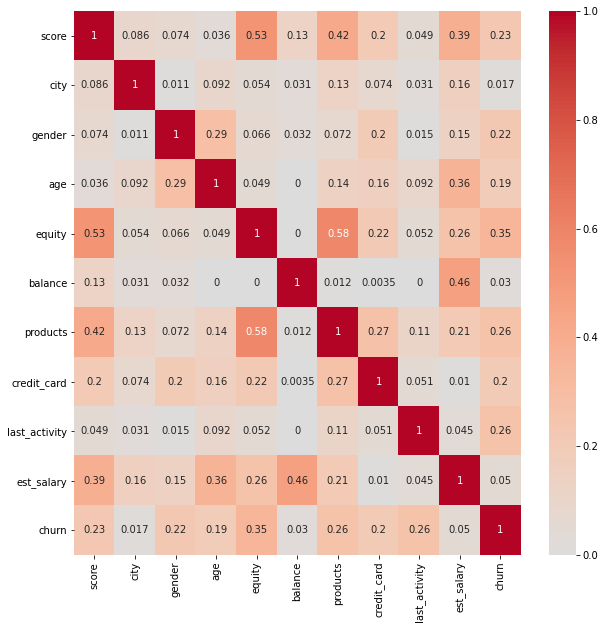

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,1:12].phik_matrix(interval_cols=['score', 'balance', 'est_salary', 'age']), cmap='coolwarm', center=0, annot=True);

Распределим результаты по группам значимости:
1. Средняя корреляция:
   - кредитный рейтинг - баллы собственности;
   - баллы собственности - количество продуктов.
2. Слабая корреляция:
   - кредитный рейтинг - количество продуктов;
   - кредитный рейтинг - ожидаемая зарплата;
   - возраст - ожидаемая зарплата;
   - **баллы собственности - признак отточности;**
   - баланс - ожидаемая зарплата;
Остальные значения корреляции ниже 0.3 и свидетльствуют об очень слабой взаимосвязи.
***
Отдельно рассмотрим корреляцию признаков с признаком отточности.

Так как данный признак является ключевым в нашем исследовании ключевым, то в отношении него мы будем учитывать корреляции с уровнем выше 0.2.

1. **Баллы собственности.** Этот признак сильнее остальных коррелирует с признаком отточности. Корреляция равна 0.35.
2. **Количество продуктов банка** и **признак активности клиента**. Корреляция каждого из этих признаков с признаком отточности составляет 0.26.
3. **Кредитный рейтинг**. Корреляция данного признака с признаком отточности составляет 0.23. Ранее мы уже выяснили, что клиенты с рейтингом выше среднего уходят наиболее активно.
4. **Пол**. Корреляция равна 0.22. Ранее мы уже обнаружили, что мужчины значительно чаще женщин уходят из банка.

<a id='ch5.3' ></a>
## Портреты типичных клиентов

Сформируем портреты типичного лояльного банку клиента и типичного клиента, который ушел из банка, а затем сравним их основные признаки.

In [74]:
data.groupby('churn').agg({'age':'mean'})

,age
churn,
0,43.012017
1,41.425977


In [75]:
churn_compare = round(data.pivot_table(columns='churn', aggfunc={'age':['mean', 'median'],
                                           'score':['mean', 'median'],
                                           'balance':['mean', 'median'],
                                           'est_salary':['mean', 'median'],
                                           'equity':'median',
                                           'products':'median'}), 2)

In [76]:
churn_compare['ratio'] = churn_compare[1] - churn_compare[0]

In [77]:
churn_compare

churn                      0           1      ratio
age        mean        43.01       41.43      -1.58
           median      40.00       39.00      -1.00
balance    mean    802806.10  1143408.74  340602.64
           median  528486.79   785407.33  256920.54
equity     median       3.00        4.00       1.00
est_salary mean    140123.95   148089.95    7966.00
           median  117293.08   125395.22    8102.14
products   median       2.00        2.00       0.00
score      mean       845.41      863.43      18.02
           median     848.00      866.00      18.00

In [78]:
churn_mode = pd.concat([data[data['churn'] == 0][['city', 
                                    'gender', 
                                    'credit_card',
                                    'last_activity']].mode(),
          data[data['churn'] == 1][['city', 
                                    'gender', 
                                    'credit_card',
                                    'last_activity']].mode()],
         axis=0,
         ignore_index=True).T
churn_mode

,0,1
city,Ярославль,Ярославль
gender,Ж,М
credit_card,1,1
last_activity,0,1


In [79]:
churn_mode['ratio'] = '-'

Создадим сводную таблицу, в которой будет вся информация о типичных клиентах.

In [80]:
pd.concat([churn_compare, churn_mode])

,0,1,ratio
"(age, mean)",43.01,41.43,-1.58
"(age, median)",40.0,39.0,-1.0
"(balance, mean)",802806.1,1143408.74,340602.64
"(balance, median)",528486.79,785407.33,256920.54
"(equity, median)",3.0,4.0,1.0
"(est_salary, mean)",140123.95,148089.95,7966.0
"(est_salary, median)",117293.08,125395.22,8102.14
"(products, median)",2.0,2.0,0.0
"(score, mean)",845.41,863.43,18.02
"(score, median)",848.0,866.0,18.0


<a id='ch5.3.1' ></a>
### Портрет лояльного клиента

Это **женщина** из **Ярославля** в возрасте **от 40 до 45 лет** с зарплатой в районе **110 000 - 120 000 рублей**. У нее **есть кредитная карта**, **3 объекта собственности**. Скорее всего она обладает **либо невысоким кредитным рейтингом (до 820 баллов), либо наоборот крайне высоким (более 950 баллов)**. У нее на балансе **чуть более 500 000**. В среднем он пользуется **двумя продуктами** банка и **не является активным пользователем услуг банка**.

<a id='ch5.3.2' ></a>
### Портрет клиента, который отказался от услуг банка

Это **мужчина** из **Ярославля** в возрасте **от 25 до 35 либо от 50 до 60 лет** с зарплатой в районе **120 000 - 130 000 рублей**. У него **есть кредитная карта**, **4 объекта собственности** и **кредитный рейтинг в районе 860-870 баллов**. У него на балансе **около 800 000 рублей**. В среднем он пользуется **двумя продуктами** банка и до ухода **являлся активным пользователем услуг банка**.

Наиболее заметными различиями являются:

1. Пол - лояльные клиенты в основном женщины, а уходят в основном мужчины.
2. Зарплата - наблюдаемая разница в зарплате составляет примерно 8 000 рублей.
3. Кредитный рейтинг - несмотря на то, что средний и медианный кредитный рейтинг у двух групп отличается не слишком сильно, ранее на графике мы видели, что среди ушедших клиентов большое количество среднего рейтинга или рейтинга выше среднего, а среди лояльных клиентов либо обладатели высокого кредитного рейтинга, либо обладатели низкого кредитного рейтинга.
4. Возраст - несмотря схожие средние значения, графики демонстрируют, что уходят в основном люди в возраст от 25 до 35 и от 50 до 60 лет, а лояльные клиенты более однородны и их средний возраст составляет 40 - 45 лет.

<a id='ch6' ></a>
# Проверка статистических гипотез

<a id='ch6.1' ></a>
## Гипотеза № 1. Сравнение дохода клиентов, которые ушли, и клиентов, которые остались лояльны банку

Прямое сравнение зарплат лояльных и ушедших клиентов показало, что зарплаты ушедших клиентов в среднем выше на 8 000 рублей. Однако мы не можем однозначно говорить о какой-то разнице, возможно, разница возникла случайно. Для того, чтобы с большей уверенностью говорить о наличии/отстуствии разницы между двумя группами, проведем статистический тест.

<a id='ch6.1.1' ></a>
### Выбор статтеста

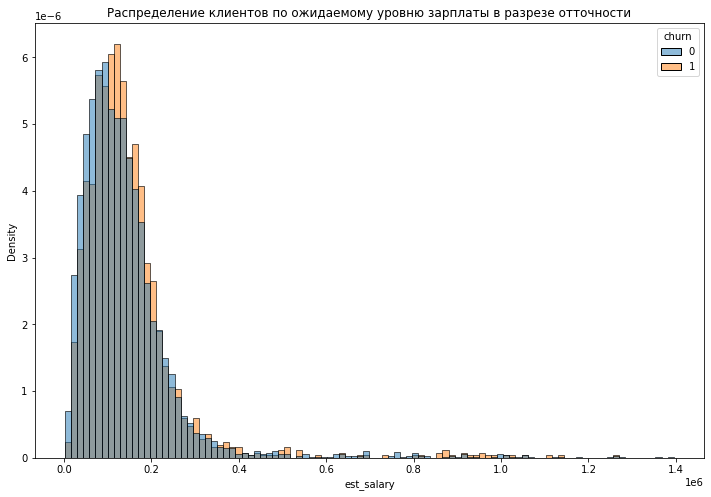

In [81]:
plt.figure(figsize=(12,8))
sns.histplot(x='est_salary', data=data, hue='churn', stat="density", common_norm=False, bins=100)
plt.title('Распределение клиентов по ожидаемому уровню зарплаты в разрезе отточности');

Нам необходимо сравнить средние значения зарплат двух выборок: лояльных клиентов и клиентов, ушедших из банка. 
Основной опцией поиска статистически значимой разницы между средними выборок является т-тест. Однако сначала необходимо проверить, соответствуют ли данные в выборках требованиям, предъявляемым к данным при проведении т-теста.


1. Генеральные совокупности должны не зависеть друг от друга. В нашем случае это правило соблюдается, ушедшие и лояльные клиенты не связаны между собой. 
2. Для применения Т-теста необходимо, чтобы выборочное среднее обеих групп распределялось нормально. В наших выборках по несколько тысяч измерений, поэтому в соответствии с центральной предельной теоремой мы можем утверждать, что выборочное среднее в них распределяется нормально.
3. Дисперсии рассматриваемых совокупностей равны. Мы имеем две группы значительно отличающиеся по размеру, поэтому мы не можем по умолчанию принять, что дисперсии генеральных совокупностей равны. Однако в виду того, что у нас есть возможность оперерировать с генеральными совокупностями (так как мы рассматриваем ВСЕХ клиентов банка), то мы можем посчитать и сравнить дисперсии.

In [82]:
statistics.variance(data[data['churn'] == 1]['est_salary'])/statistics.variance(data[data['churn'] == 0]['est_salary'])

1.03378736223843

Относительная разница дисперсий составляет всего 3.3%. При расчете т-теста можем считать, что дисперсии генеральных совокупностей равны. 

<a id='ch6.1.2' ></a>
### Определение гипотез и проведение статистического теста

В нашем случае нулевая гипотеза будет звучать следующим образом:

***H0: Средняя зарплата лояльных клиентов равна средней зарплате клиентов, ушедших из банка.***

Альтернативная гипотеза в таком случае будет звучать:

***H1: Средние зарплаты лояльныз и нелояльных клиентов статистически значимо различаются.***

Уровень статистической значимости будет равен 0.05

In [83]:
alpha = 0.05

no_churn_data = data[data['churn'] == 0]['est_salary']

churn_data = data[data['churn'] == 1]['est_salary']

results = st.ttest_ind(no_churn_data, churn_data)

print('P-value равно', results.pvalue)

if results.pvalue < alpha:
    print('P-value меньше уровня значимости. Отвергаем нулевую гипотезу в пользу альтернативной.')
else:
    print('P-value больше уровня значимости. У нас нет оснований отвергнуть нулевую гипотезу.')

P-value равно 0.011107046249328876
P-value меньше уровня значимости. Отвергаем нулевую гипотезу в пользу альтернативной.


Итак, p-value оказался меньше уровня значимости, следовательно мы отвергаем гипотезу о том, что зарплата лояльных клиентов равна зарплате клиентов, покинувших банк, в пользу гипотезы, что средняя зарплата клиентов из данных групп не равны.

<a id='ch6.2' ></a>
## Гипотеза № 2. Разница в доле оттока клиентов в Ярославле и Рыбинске

В ключевом для банка городе - Ярославле наблюдается отток клиентов выше среднего уровня по банку. Во втором по значимости городе - Рыбинске отток наоборот несколько ниже среднего уровня. Мы можем предположить, что обслуживание и организация процессов лучше в отделениях банка в Рыбинске. В таком случае для исправления ситуации в Ярославле можно провести сравнительный анализ организации процессов и обслуживания там и в Рыбинске, чтобы перенять лучшие практики, либо командировать управляющих из Рыбинска в Ярославль. Однако такие решения потребуют ресурсных затрат, поэтому сначала проверим статистическую значимость разницы в долях оттока клиентов в двух городах.

<a id='ch6.2.1' ></a>
### Выбор статтеста

Мы будем сравнивать доли двух выборок, поэтому будем проверять доли для пропорций. В данном случае статистикой будет разница между  рассматриваемыми пропорциями.

<a id='ch6.2.2' ></a>
### Определение гипотез и проведение статистического теста

В нашем случае нулевая гипотеза будет звучать следующим образом:

***H0: Доли ушедших клиентов в Ярославле и Рыбинске равны.***

Альтернативная гипотеза в таком случае будет звучать:

***H1:  Доли ушедших клиентов в Ярославле и Рыбинске не равны.***

Уровень статистической значимости будет равен 0.05

In [84]:
alpha = 0.05

# количество ушедших клиентов в Ярославле и в Рыбинске
churn_clients = np.array([len(data[(data['churn'] == 1) & (data['city'] == 'Ярославль')]), 
                         len(data[(data['churn'] == 1) & (data['city'] == 'Рыбинск')])])

# общее количество клиентов в Ярославле и Рыбинске
city_clients = np.array([len(data[data['city'] == 'Ярославль']), 
                         len(data[data['city'] == 'Рыбинск'])])

# доля ушедших клиентов в Ярославле
p1 = churn_clients[0]/city_clients[0]

# доля ушедших клиентов в Рыбинске
p2 = churn_clients[1]/city_clients[1]

# Пропорция ушедших клиентов в комбинированном датасете
p_combined = (churn_clients[0] + churn_clients[1])/(city_clients[0] + city_clients[1])

# Разница между долями
difference = p1 - p2

In [85]:
# Расчет статистики в стандартных отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/city_clients[0] + 1/city_clients[1]))
# Строим стандартное нормальное распределение
distr = st.norm(0, 1)

In [86]:
p_value = (1 - distr.cdf(abs(z_value))) * 2


print('P-value: ', p_value)

if p_value < alpha:
    print('P-value меньше уровня значимости. Отвергаем нулевую гипотезу в пользу альтернативной.')
else:
    print('P-value больше уровня значимости. У нас нет оснований отвергнуть нулевую гипотезу.')

P-value:  0.0016088265306373195
P-value меньше уровня значимости. Отвергаем нулевую гипотезу в пользу альтернативной.


Статистический тест показал, что разница в доле ушедших клиентов в Ярославле и Рыбинске не вызвана случайностью.

<a id='ch7' ></a>
# Промежуточные итоги

**На этапе EDA мы установили, что:**
1. оставшихся клиентов почти в 5 раз больше чем ушедших: 8155 против 1819. Доля ушедших клиентов (она же средний уровень оттока клиентов из банка) составляет 18.38%.
2. Мы рассмотрели все имеющиеся признаки и обнаружили группы риска для каждого:
   - **Возраст.** Первая группа риска клиенты от 25 до 35 лет, а вторая - клиенты от 50 до 60 лет.
   - **Кредитный рейтинг**. В группу риска попали клиенты с рейтингом от 820 до 940 баллов.
   - **Баланс**. Начиная от суммы на балансе равно1 800 000 руб., заметен отток клиентов из банка, причем заметна тенденция, что чем больше сумма, тем активнее клиенты уходят.
   - **Зарплата**. В зоне риска клиенты с зарплатой выше 100 000 рублей.
   - **Пол**. Мужчины уходят заметно чаще чем средний уровень оттока по банку. А женщина наоборот более лояльны.
   - **Город:** в Ярославле и Ростове отток немного выше чем в среднем по банку, а в Рыбинске заметно ниже.
   - **Баллы собственности (количество объектов собственности):** Наблюдается явная тенденция - чем больше собственности у клиентов, тем с большей вероятностью они покидают банк. Начиная с трех баллов доля оттока превышает средний уровень по банку.
   - **Количество продуктов**: Мы видим, что уровень оттока клиентов, у которых 3 и более продуктов значительно превышает средний уровень оттока по банку. Клиенты с двумя продуктами демонстрируют средний отток, а клиенты с одним продуктом имеют уровень оттока более чем в два раза ниже чем в среднем по банку.
   - **Активность:** наблюдается неожиданный результат: активные клиенты уходят намного чаще чем в среднем по банку, а клиенты, которые не демонстрировали активность в последнее время, наоборот заметно лояльнее чем в среднем по банку. Скорее всего это связано с тем, что банк не может предложить активным пользователям то, что они ождиают получить от банка в современных условиях. Это укладывается в единую картину с тем, что клиенты с высокой зарплатой и большими суммами на счетах являются наименее лояльной категорией клиентов.
   - **Наличие кредитной карты:** доля оттока у клиентов без кредитной карты выше среднего уровня оттока клиентов из банка. Клиенты с кредитной картой наоборот в меньшей степени склонны отказываться от услуг банка.
   
Если смотреть на результаты EDA в целом, то можно предположить, что банк в основном теряет наиболее состоятельную и активную часть своих клиентов. Это может быть связано с тем, что в банке не развито направление по работе с обеспеченными клиентами. Так как их запросы заметно отличаются от потребностей менее обеспеченных клиентов. Например, они могут быть заинтересованы во вложении своих средств в ценные бумаги для обеспечения доходности и сохранения сбережений от воздействия инфляции.
***
**Корреляция признаков.**

Мы предположили, что взаимосвязь между признаками может быть нелинейной, так как у нас есть непрерывные и дискретные/категориальные признакие. Поэтому мы использовали библиотеку phik, которая позволяет посчитать корреляцию с учетом того, к какому типу относится тот или иной признак (непрерывный/дискретный).Данный метод расчета не показывает направленность взаимосвязи. Но на предыдущем этапе мы уже оценили направленность взаимосвязи признака отточности с другими признаками, поэтому отсутствие данной информации при расчете корреляции не так критично.

Также расчет корреляции по методу phik требует явно указать непрерывные величины. **Непрерывными величинами мы считали кредитный рейтинг, сумму на балансе и зарплату**. **Возраст** при статистических расчетах принято принимать за дискретную величину.

Для оценки и интерпритации  результатов используем шкалу корреляции Чеддока:
- 0 – полное отсутствие связи;
- 0 – 0.3 – очень слабая;
- 0.3 – 0.5 – слабая;
- 0.5 – 0.7 – средняя;
- 0.7 – 0.9 – высокая;
- 0.9 – 1 – очень высокая;
- 1 – абсолютная взаимозависимость.

В итоге мы получили следующие результаты:

1. Средняя корреляция:
   - кредитный рейтинг - баллы собственности;
   - баллы собственности - количество продуктов.
2. Слабая корреляция:
   - кредитный рейтинг - количество продуктов;
   - кредитный рейтинг - ожидаемая зарплата;
   - возраст - ожидаемая зарплата;
   - **баллы собственности - признак отточности;**
   - баланс - ожидаемая зарплата;
Остальные значения корреляции ниже 0.3 и свидетльствуют об очень слабой взаимосвязи.

Отдельно мы рассмотрели корреляцию признаков с признаком отточности.

Так как данный признак является ключевым в нашем исследовании ключевым, то в отношении него мы учитывали корреляции с уровнем выше 0.2.

1. **Баллы собственности.** Этот признак сильнее остальных коррелирует с признаком отточности. Корреляция равна 0.35.
2. **Количество продуктов банка** и **признак активности клиента**. Корреляция каждого из этих признаков с признаком отточности составляет 0.26.
3. **Кредитный рейтинг**. Корреляция данного признака с признаком отточности составляет 0.23. Ранее мы уже выяснили, что клиенты с рейтингом выше среднего уходят наиболее активно.
4. **Пол**. Корреляция равна 0.22. Ранее мы уже обнаружили, что мужчины значительно чаще женщин уходят из банка.
***
**Портреты типичных клиентов банка.**

Мы сформировали два портрета типичных клиентов банка:
- **Лояльный клиент.** Это **женщина** из **Ярославля** в возрасте **от 40 до 45 лет** с зарплатой в районе **110 000 - 120 000 рублей**. У нее **есть кредитная карта**, **3 объекта собственности**. Скорее всего она обладает **либо невысоким кредитным рейтингом (до 820 баллов), либо наоборот крайне высоким (более 950 баллов)**. У нее на балансе **чуть более 500 000**. В среднем он пользуется **двумя продуктами** банка и **не является активным пользователем услуг банка**.
- **ушедший клиент.** Это **мужчина** из **Ярославля** в возрасте **от 25 до 35 либо от 50 до 60 лет** с зарплатой в районе **120 000 - 130 000 рублей**. У него **есть кредитная карта**, **4 объекта собственности** и **кредитный рейтинг в районе 860-870 баллов**. У него на балансе **около 800 000 рублей**. В среднем он пользуется **двумя продуктами** банка и до ухода **являлся активным пользователем услуг банка**.
- **Главные отличия:**
  1. Пол - лояльные клиенты в основном женщины, а уходят в основном мужчины.
  2. Зарплата - наблюдаемая разница в зарплате составляет примерно 8 000 рублей.
  3. Кредитный рейтинг - несмотря на то, что средний и медианный кредитный рейтинг у двух групп отличается не слишком сильно,  ранее на графике мы видели, что среди ушедших клиентов большое количество среднего рейтинга или рейтинга выше среднего, а среди лояльных клиентов либо обладатели высокого кредитного рейтинга, либо обладатели низкого кредитного рейтинга.
  4. Возраст - несмотря схожие средние значения, графики демонстрируют, что уходят в основном люди в возраст от 25 до 35 и от 50 до 60 лет, а лояльные клиенты более однородны и их средний возраст составляет 40 - 45 лет.
***
**Проверка статистических гипотез.**
Мы проверили 2 гипотезы:
1. С помощью Т-теста мы проверили гипотезу о том, что средняя зарплата ушедших клиентов равна средней зарплате лояльных клиентов. **В итоге мы отвергли гипотезу о том, что зарплаты этих двух групп клиентов равны, в пользу гипотезы о том, что зарплаты ушедших клиентов не равны зарплате лояльных клиентов.**
2. С помощью z-статистики мы проверили гипотезу о том, что доля ушедших клиентов в Ярославле равна доле ушедших клиентов в Рыбинске. **По итогу мы отвергли гипотезу о равнестве долей в пользу гипотезы о том, что доли ушедших клиентов в Ярославле и Рыбинске не равны.**

<a id='ch8' ></a>
# Сегментация пользователей.

У нас в наличии 10 признаков за исключением признака оттока:
1. Кредитный рейтинг;
2. Город;
3. Пол;
4. Возраст;
5. Баллы собственности;
6. Баланс;
7. Количество используемых продуктов банка;
8. Наличие кредитной карты;
9. Признак активности;
10. Зарплата.

К наиболее влияющим на отточность признакам можно отнести:

1. Пол - в зоне риска мужчины;
2. Признак активности - в зоне риска активные клиенты;
3. Кредитный рейтинг - в зоне риска люди с рейтингом от 820 до 940.
4. Возраст - в зоне риска две группы клиентов: от 25 до 35 и от 50 до 60.

Исходя из этого мы сформируем 4 сегмента.

<a id='ch8.1' ></a>
## Сегмент 1. Мужчины с зарплатой более 100 000 руб., не имеющие кредитной карты

In [87]:
first_segment = data[(data['est_salary'] > 100000) 
                     & (data['gender'] == 'М') 
                     & (data['credit_card'] == 0)].reset_index(drop=True)

In [88]:
len(first_segment)

850

In [89]:
len(first_segment)/len(data)

0.08595409040347861

In [90]:
len(first_segment[first_segment['churn'] == 1])/len(first_segment)

0.3764705882352941

В данном сегменте 850 клиентов (8.6% от общего количества клиентов). Доля оттока в данном сегменте составляет **37.6% - это в два раза выше среднего уровня оттока по банку.**

<a id='ch8.2' ></a>
## Сегмент 2. Люди в возрасте от 25 до 35 лет, у которых 3 и более объекта собственности, и которые живут в Ярославле.

In [91]:
second_segment = data[(data['age'] >= 25) 
                      & (data['age'] <= 35) 
                      & (data['equity'] >= 3) 
                      & (data['city'] == 'Ярославль')].reset_index(drop=True)

In [92]:
len(second_segment)

1061

In [93]:
len(second_segment)/len(data)

0.10729092931540095

In [94]:
len(second_segment[second_segment['churn'] == 1])/len(second_segment)

0.35532516493873706

В данном сегменте 1061 клиент (10.7% от общего количества клиентов). Доля оттока в данном сегменте составляет **35.5%, что также почти в два раза выше среднего уровня по банку.**

<a id='ch8.3' ></a>
## Сегмент 3. Люди  в возрасте от 50 до 60 лет с кредитным рейтингом в диапазоне от 820 до 940, пользующихся 2 или более продуктами банка

In [95]:
third_segment = data[(data['age'] >= 50) 
                     & (data['age'] <= 60) 
                     & (data['products'] >= 2) 
                     & (data['score'] >= 820)
                     & (data['score'] <= 940)].reset_index(drop=True)

In [96]:
len(third_segment)

766

In [97]:
len(third_segment)/len(data)

0.07745980382242897

In [98]:
len(third_segment[third_segment['churn'] == 1])/len(third_segment)

0.39556135770234985

В данном сегменте 766 клиентов (7.8% от общего количества клиентов). Доля оттока в данном сегменте составляет **39.5%**.

<a id='ch8.4' ></a>
## Сегмент 4. Активные пользователи, у которых на балансе более 800 000 рублей, живущие не в Ярославле.

In [99]:
fourth_segment = data[(data['last_activity'] == 1) 
                     & (data['balance'] >= 800000) 
                     & (data['city'] != 'Ярославль')].reset_index(drop=True)

In [100]:
len(fourth_segment)

628

In [101]:
len(fourth_segment)/len(data)

0.06350490443927596

In [102]:
len(fourth_segment[fourth_segment['churn'] == 1])/len(fourth_segment)

0.35987261146496813

В данном сегменте 628 клиентов (6.4% от общего количества клиентов). Доля оттока в данном сегменте составляет **36%.**

<a id='ch8.5' ></a>
## Приоритезация сегментов

Для успешного развития банка критически важно привлечение средств. Также для банка крайне важно, чтобы его клиенты максимально активно пользовались его услугами - это позволяет развивать новые направления, диверсифицировать свою деятельность, и, соответственно, риски.

Поэтому наиболее важными признаками клиента мы будем считать сумму на балансе и количество продуктов, которыми он пользуется.

Исходя из этого, приоритизацию сегментов мы будем проводить по формуле:

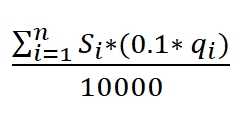

где
- n - количество клиентов в сегменте;
- S - сумма на балансе клиента;
- q - количество продуктов, которыми пользуется клиент;
- 0.0001 - коэффициент, позволяющий уменьшить итоговое значение, для удобства.

**Данная формула показывает оценочную ценность сегмента.**

Зададим функцию, которая будет считать показатель приоритизации. Мы не учитывали процент отточности клиентов, так как все 4 сегмента имеют схожие значения уровня отточности, вдвое превышающие средний уровень банка.

In [103]:
def segment_prior(df):
    result = 0
    for i in range(len(df)):
        result += (df['balance'][i]*0.1*df['products'][i])
        total = result/10000
    return round(total)

In [104]:
segment_prior(first_segment)

26065

In [105]:
segment_prior(second_segment)

22357

In [106]:
segment_prior(third_segment)

22125

In [107]:
segment_prior(fourth_segment)

19849

Мы получили следующую приоритизацию (от наиболее важных к наименее важным):
1. **Сегмент 1.** Мужчины с зарплатой более 100 000 руб., не имеющие кредитной карты.
2. **Сегмент 2.** Люди в возрасте от 25 до 35 лет, у которых 3 и более объекта собственности, и которые живут в Ярославле.
3. **Сегмент 3.** Люди  в возрасте от 50 до 60 лет с кредитным рейтингом в диапазоне от 820 до 940, пользующихся 2 или более продуктами банка.
4. **Сегмент 4.** Активные пользователи, у которых на балансе более 800 000 рублей, живущие не в Ярославле.


<a id='ch9' ></a>
# Разработка рекомендаций по удержанию клиентов из различных сегментов.

<a id='ch9.1' ></a>
## Сегмент 1. Мужчины с зарплатой более 100 000 руб., не имеющие кредитной карты

Для удержания таких клиентов можно предложить следующие рекомендации:
1. Информирование о возможности покупки ценных бумаг/драгоценных металлов, как инструмента для сохранения и увеличения накоплений.
2. Специальные условия автокредитования.
3. Кредитная карта с повышенным сроком беспроцентного кредитования.

<a id='ch9.2' ></a>
## Сегмент 2. Люди в возрасте от 25 до 35 лет, у которых 3 и более объекта собственности, и которые живут в Ярославле

1. Сниженная ставка на кредит на получение второго высшего образования. (так как в возрасте от 25 до 35 люди чаще всего решают получить второе высшее образование).
2. Сервис по управлению имуществом:
    - автоматическая оплата коммунальных платежей;
    - все выписки и документы можно найти в едином личном кабинете;
    - уплата налогов от сдачи недвижимости в аренду в автоматическом режиме;
3. Кэшбек на магазины, рестораны и услуги в Ярославле.

<a id='ch9.3' ></a>
## Сегмент 3. Люди  в возрасте от 50 до 60 лет с кредитным рейтингом в диапазоне от 820 до 940, пользующихся 2 или более продуктами банка

1. Программа "Доверие" - выдача кредита на тех же условиях, что и для клиентов с рейтингом 950+ баллов.
2. +0.1% на вклады за каждый новый используемый продукт банка и бот-помощник, рассказывающий о всех преимуществах и нововведениях в продуктах банка.
3. Сниженная процентная ставка на покупку загородной недвижмости.

<a id='ch9.4' ></a>
## Сегмент 4. Активные пользователи, у которых на балансе более 800 000 рублей, живущие не в Ярославле

1. Личный инвестиционный консультант, который помогает инвестировать накопления наиболее безопасным и выгодным способом.
2. Повышенный кэшбек на заправках. (так как скорее всего люди часто ездят в областной центр).
3. Благодарность за активность в виде специальных предложений (например 0 рублей в год за обслуживание карты и т.д.).

<a id='ch10' ></a>
# Презентация для менеджмента

Основные выводы и результаты анализа представлены в [презентации](https://disk.yandex.ru/d/xRShOc5bxDu9BA).